**Créditos**

Este notebook foi baseado em três outros notebooks:
* https://github.com/mrdbourke/your-first-kaggle-submission/tree/master
* https://www.kaggle.com/kenjee/titanic-project-example
* https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# **Roteiro:**

* **Análise exploratória de dados (EDA)**

    * Entender as variáveis
    * Analisar as relações
    * Ter insights sobre a criação de novas variáveis e o descarte de variáveis já existentes
    * Plotar alguns gráficos para facilitar a interpretação dos dados
    * Verificar dados faltantes e decidir como preenchê-los
    
    
* **Engenharia de dados (Feature Engineering)**

    * Criar novas variáveis 
    * Descartar variáveis redundantes ou desnecessárias
    * Conversão de variáveis
    
    
* **Treinamento e calibração do modelo**

    * Treinar os algoritmos
    * Escolher os melhores parâmetros

#  **Definindo e entendendo os dados**

* Nome da variável: **Survival**
* Tipo: categórica
* Definição: Sobreviventes e não sobreviventes. 1 = sobreviveu, 0 = não sobreviveu


* Nome da variável: **Pclass**
* Tipo: categórica
* Definição: Classe da cabine do passageiro. 1 = primeira classe, 2 = segunda classe, 3 = terceira classe


* Nome da variável: **Sex**
* Tipo: categórica
* Definição: Sexo do passageiro. Male = homem, Female = mulher


* Nome da variável: **Sibsp**
* Tipo: numérica
* Definição: Indica a existência e quantidade de irmãos, irmãs, esposo ou esposa. 


* Nome da variável: **Parch**
* Tipo: numérica
* Definição: Indica a existência e quantidade de pais, mães, filhos ou filhas.


* Nome da variável: **Ticket**
* Tipo: alfanumérica
* Definição: combinação de letras e números representando o ingresso de cada passageiro.


* Nome da variável: **Fare**
* Tipo: numérica
* Definição: indica o gasto que cada passageiro teve dentro do navio.


* Nome da variável: **Cabin**
* Tipo: alfanumérica
* Definição: indica o código da cabine de cada passageiro.


* Nome da variável: **Embarked**
* Tipo: categórica
* Definição: define a cidade de embarque de cada passageiro. C = Cherbourg, Q = Queenstown e S = Southampton



In [2]:
# Análise e manipulação de dados
import pandas as pd
import numpy as np
import random as rnd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

In [3]:
treino_dados = pd.read_csv('../input/titanic/train.csv')
teste_dados = pd.read_csv('../input/titanic/test.csv')
combine = [treino_dados, teste_dados]

# Observando como os dados estão dispostos

As funções .head(), .describe() e .info() nos dão uma boa amostra sobre a base de dados.

In [4]:
treino_dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
treino_dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
treino_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print(treino_dados.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
treino_dados.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ayoub, Miss. Banoura",male,1601,G6,S
freq,1,577,7,4,644


In [9]:
teste_dados.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
teste_dados.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Dividindo os dados em numéricos e categóricos

As variáveis com dados numéricos e com dados categóricos serão tratadas de formas diferentes. 

In [11]:
dados_numericos = treino_dados[['Age', 'SibSp', 'Parch', 'Fare']]
dados_categoricos = treino_dados[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

# Analisando dados faltantes

A função missingno.matrix() nos retorna um gráfico onde os espaços em branco representam os valores faltantes em cada variável. Nesse caso, vemos que existem alguns valores faltantes na variável de idade, e vários valores faltantes na variável cabine.

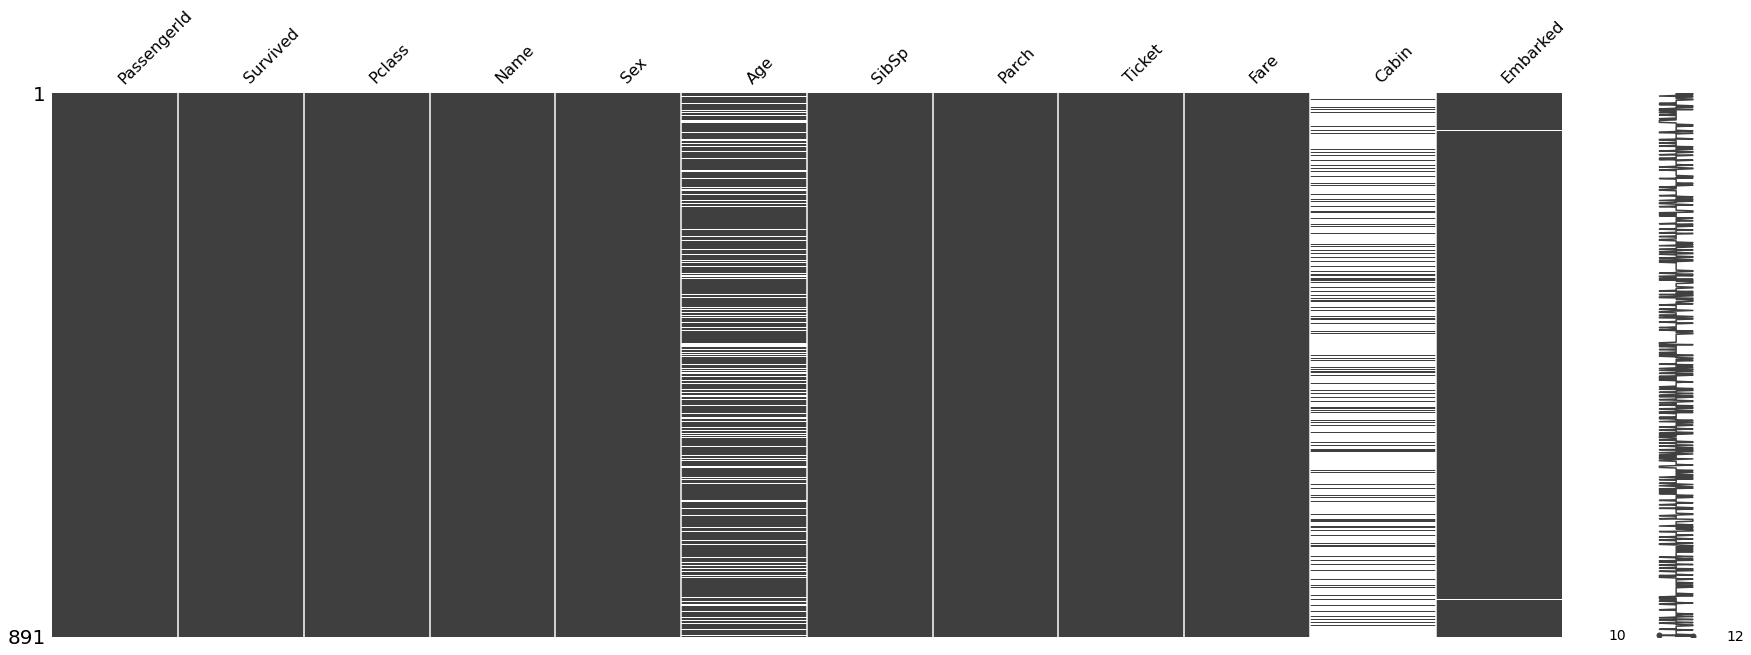

In [12]:
missingno.matrix(treino_dados, figsize = (30,10))

# Plotando histogramas dos dados numéricos para observar a distribuição

O ideal é que os dados numéricos sigam uma distribuição normal (formato de sino). Podemos usar a função log para normalizar a distribuição de uma variável, mas preferi analisar melhor cada caso antes de tomar uma decisão final.

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


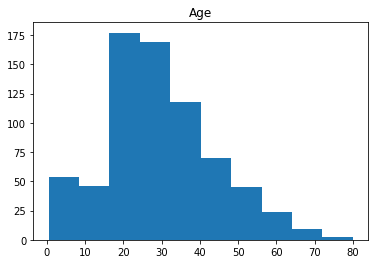

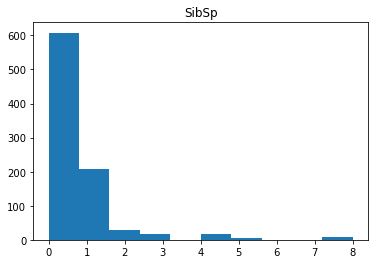

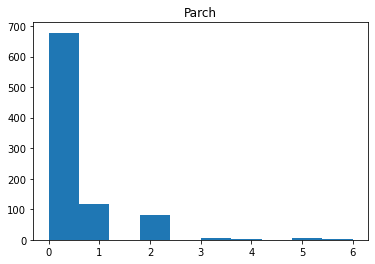

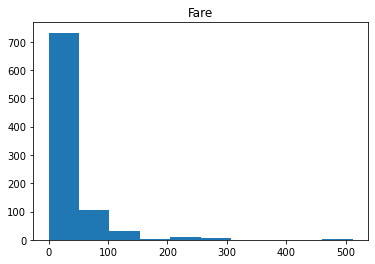

In [13]:
for i in dados_numericos.columns:
    plt.hist(dados_numericos[i])
    plt.title(i)
    plt.show()

# Plotando mapa de calor para identificar correlações entre os dados numéricos

Podemos observar que as variáveis Parch e SibSp tem uma correlação considerável. 

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


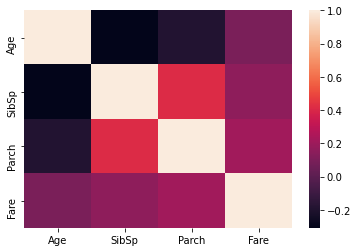

In [14]:
print(dados_numericos.corr())
sns.heatmap(dados_numericos.corr())

# Plotando gráficos de barra dos dados categóricos para observar as frequências

* **De acordo com os gráficos, observamos que:**

    *  O número de sobreviventes é menor do que o número de não-sobreviventes
    *  O maior número de passageiros pertenciam a terceira classe
    *  A maioria dos passageiros eram homens
    *  A maior parte dos embarques foram feitos em Southampto
    *  As variáveis Cabin e Ticket possuem muitos valores diferentes

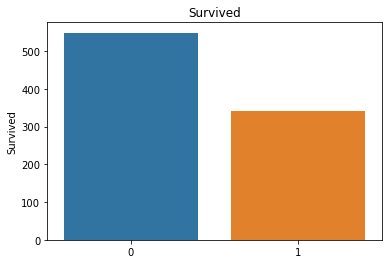

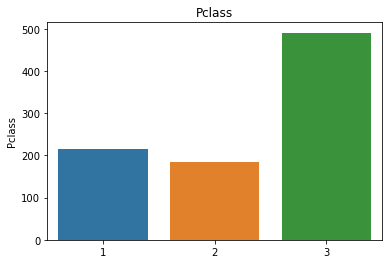

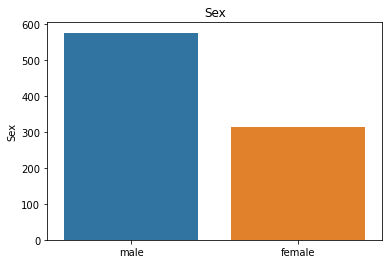

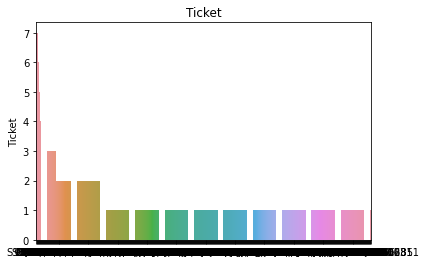

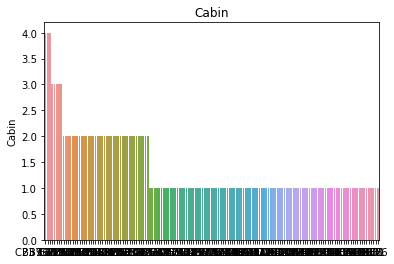

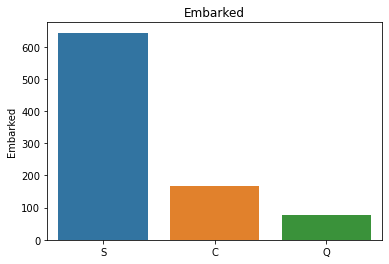

In [15]:
for i in dados_categoricos.columns:
    sns.barplot(dados_categoricos[i].value_counts().index,dados_categoricos[i].value_counts()).set_title(i)
    plt.show()

# Plotando tabelas para observar a relação entre os dados das variáveis com o resultado (se sobreviveu ou não)

* **Novas observações podem ser feitas:**
    * ~63% dos passageiros da primeira classe sobreviveram, enquanto apenas 47% da segunda classe e 24% da terceira classe conseguiram sobreviver
    * 74% das mulheres sobreviveram, enquanto apenas ~19% dos homens conseguiram sobreviver
    * Quanto maior a quantidade de parentes que um passageiro tinha no navio (tanto SibSp quanto Parch), menores são as chances que esse passageiro tenha sobrevivido

In [16]:
treino_dados[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
treino_dados[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
treino_dados[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
treino_dados[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analisando a relação entre idade e número de sobreviventes

Aqui vemos que boa parte dos passageiros entre 15 e 45 anos não conseguiram sobreviver. Observamos também que um passageiro mais velho (próximo aos 80 anos) sobreviveu, assim como a maior parte das crianças entre 0 e 10 anos.

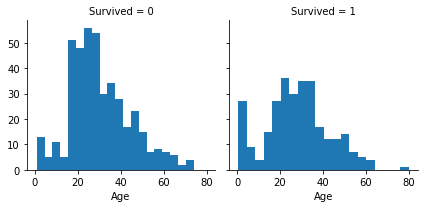

In [20]:
g = sns.FacetGrid(treino_dados, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Analisando a relação entre classe e número de sobreviventes, de acordo com a idade

* A maior parte dos passageiros da primeira classe sobreviveram, independente da idade
* Entre os passageiros da segunda classe, todas as crianças foram salvas, mas boa parte das pessoas entre 17 - 40 anos não sobreviveram
* A maioria dos passageiros da terceira classe não sobreviveram, sendo que a maior parte dos óbitos foram de passageiros entre 15-30 anos

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


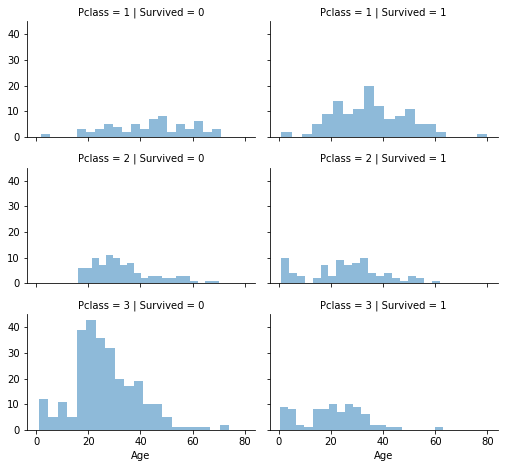

In [21]:
grid = sns.FacetGrid(treino_dados, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Analisando a relação do número de homens e mulheres sobreviventes, de acordo com a classe e o local de embarque

* **Embarques em Southampton:**
    * Quase todas as mulheres na primeira e segunda classe sobreviveram, porém menos da metade das mulheres na terceira classe conseguiram sobreviver.
    * Menos da metade dos homens conseguiram sobreviver, em todas as classes.
    

* **Embarques em Cherbourg:**
    * A maioria dos homens na primeira e segunda classe conseguiram sobreviver. Da mesma forma, aproximadamente 75% dos homens na terceira classe também sobreviveram.
    * O número de mulheres sobreviventes fica entre 25 e 50%, em todas as classes.
    

* **Embarques em Queenstown:**
    * A grande maioria das mulheres sobreviveram, em todas as classes.
    * A grande maioria dos homens não sobreviveram, em todas as classes.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


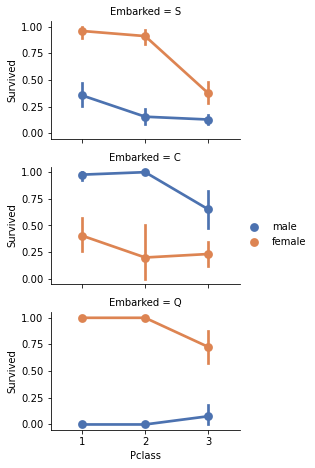

In [22]:
grid = sns.FacetGrid(treino_dados, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Analisando a relação entre o gasto de cada passageiro e o número de sobreviventes, de acordo com o local de embarque

* Os homens e as mulheres que gastaram mais tiveram uma maior chance de sobreviver, tanto nos embarques feitos em Southampton quanto em Cherbourg.
* Por outro lado, a chance de sobrevivência dos passageiros que embarcaram em Queenstown foi pouco influenciada pelo gasto que tiveram. 

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


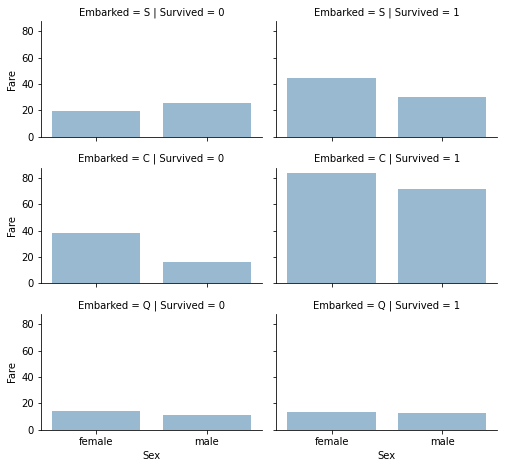

In [23]:
grid = sns.FacetGrid(treino_dados, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Engenharia de dados

De acordo com os insights tirados da análise exploratória dos dados, foram tomadas algumas decisões em relação a criação e remoção de algumas variáveis. É importante lembrar que toda mudança feita no dataset de treino deve ser refletida no dataset de testes. Segue explicação:

* **Preenchimento de valores faltantes:**
    * Os valores faltantes da variável "**Age**" serão preenchidos com a mediana das idades dos passageiros que estão na mesma classe do passageiro em questão.
    * Os valores faltantes da variável "**Embarked**" serão preenchidos com a moda da variável.
    * Os valores faltantes da variável "**Fare**" serão preenchidos com a mediana da variável.


* **Novas variáveis:**
    * Criação da variável "**cabin_multiple**", para representar os passageiros que possuem mais de uma cabine. Esse número reforça o poder aquisitivo do passageiro.
    * Criação da variável "**cabin_adv**", que guarda a letra do código de cada cabine. Provavelmente essa letra representa a localidade da cabine dentro do navio, impactando então no resultado.
    * Criação da variável "**numeric_ticket**", que representará os ingressos que possuem valores apenas numéricos.
    * Criação da variável "**ticket_letters**", que guarda as letras iniciais dos ingressos dos passageiros. 
    * Criação da variável "**Title**", onde guardaremos o título (Ms., Mr., etc) de cada passageiro. Além disso, agruparemos os títulos "Mlle" (Mademoiselle) e "Ms" junto com o título "Miss", e o título "Mme" (Madame) com o título "Mrs". Os títulos restantes serão agrupados como "Rare".
    * Criação da variável "**IsAlone**", que representa se o passageiro estava sozinho ou se foi acompanhado de familiares. Para isso, antes criaremos a variável "FamilySize", que soma as variáveis "SibSp" e "Parch" + 1 para representar o tamanho das famílias de cada passageiro. Feito isso, os passageiros que estiverem "FamilySize" igual a zero receberão 1 na variável "IsAlone", enquanto os passageiros que possuem familiares a bordo receberão 0.
    * Criação da variável "**Age* Class**", que multiplica a idade e a classe dos passageiros.
    * Criação da variável "**AgeBand**", que separa os passageiros em 5 faixas etárias.
    * Criação da variável "**FareBand**", que separa os passageiros em 4 grupos em relação aos gastos que tiveram.


* **Conversão de variáveis:**
    * A variável "**Title**" será representada de forma numérica, seguindo a regra "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5
    * A variável "**Sex**" será representada de forma numérica, seguindo a regra 'female': 1, 'male': 0
    * A variável "**Embarked**" será representada de forma numérica, seguindo a regra 'S': 0, 'C': 1, 'Q': 2
    * A variável "**cabin_adv**" será representada de forma numérica, seguindo a regra 'n': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8
    * A variável "**ticket_letters**" será representada de forma numéria, utilizando a função do pandas .get_dummies()
    * A variável "**Age**" será representada por números de 1 a 5, de acordo com a faixa etária estabelecida pela variável "AgeBand"
    * A variável "**Fare**" será representada por números de 1 a 4, de acordo com a faixa de gastos estabelecida pela variável "FareBand"


* **Remoção de variáveis:**
    * As variáveis Ticket, Cabin, Name, AgeBand, Parch, SibSp, FamilySize e FareBand foram removidas.

In [24]:
treino_dados['cabin_multiple'] = treino_dados.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
teste_dados['cabin_multiple'] = teste_dados.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

treino_dados['cabin_adv'] = treino_dados.Cabin.apply(lambda x: str(x)[0])
teste_dados['cabin_adv'] = teste_dados.Cabin.apply(lambda x: str(x)[0])

In [25]:
treino_dados['numeric_ticket'] = treino_dados.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
teste_dados['numeric_ticket'] = teste_dados.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

treino_dados['ticket_letters'] = treino_dados.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
teste_dados['ticket_letters'] = teste_dados.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [26]:
print("Before", treino_dados.shape, teste_dados.shape, combine[0].shape, combine[1].shape)

treino_dados = treino_dados.drop(['Ticket', 'Cabin'], axis=1)
teste_dados = teste_dados.drop(['Ticket', 'Cabin'], axis=1)
combine = [treino_dados, teste_dados]

"After", treino_dados.shape, teste_dados.shape, combine[0].shape, combine[1].shape

Before (891, 16) (418, 15) (891, 16) (418, 15)


('After', (891, 14), (418, 13), (891, 14), (418, 13))

In [27]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(treino_dados['Title'], treino_dados['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
treino_dados[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

treino_dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,n,0,a5,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,C,0,pc,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,n,0,stono2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,C,1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,n,1,0,1


In [30]:
treino_dados = treino_dados.drop(['Name', 'PassengerId'], axis=1)
teste_dados = teste_dados.drop(['Name'], axis=1)
combine = [treino_dados, teste_dados]
treino_dados.shape, teste_dados.shape

((891, 13), (418, 13))

In [31]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

treino_dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title
0,0,3,0,22.0,1,0,7.2500,S,0,n,0,a5,1
1,1,1,1,38.0,1,0,71.2833,C,1,C,0,pc,3
2,1,3,1,26.0,0,0,7.9250,S,0,n,0,stono2,2
3,1,1,1,35.0,1,0,53.1000,S,1,C,1,0,3
4,0,3,0,35.0,0,0,8.0500,S,0,n,1,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


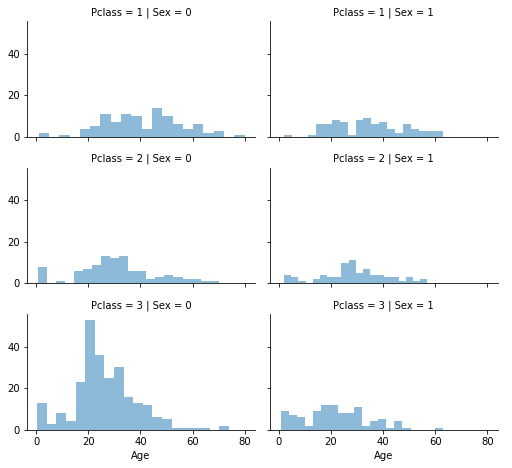

In [32]:
grid = sns.FacetGrid(treino_dados, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [33]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [34]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

treino_dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title
0,0,3,0,22,1,0,7.2500,S,0,n,0,a5,1
1,1,1,1,38,1,0,71.2833,C,1,C,0,pc,3
2,1,3,1,26,0,0,7.9250,S,0,n,0,stono2,2
3,1,1,1,35,1,0,53.1000,S,1,C,1,0,3
4,0,3,0,35,0,0,8.0500,S,0,n,1,0,1


In [35]:
treino_dados['AgeBand'] = pd.cut(treino_dados['Age'], 5)
treino_dados[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [36]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
treino_dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,0,n,0,a5,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,1,C,0,pc,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,0,n,0,stono2,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,1,C,1,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,0,n,1,0,1,"(32.0, 48.0]"


In [37]:
treino_dados = treino_dados.drop(['AgeBand'], axis=1)
combine = [treino_dados, teste_dados]
treino_dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title
0,0,3,0,1,1,0,7.2500,S,0,n,0,a5,1
1,1,1,1,2,1,0,71.2833,C,1,C,0,pc,3
2,1,3,1,1,0,0,7.9250,S,0,n,0,stono2,2
3,1,1,1,2,1,0,53.1000,S,1,C,1,0,3
4,0,3,0,2,0,0,8.0500,S,0,n,1,0,1


In [38]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

treino_dados[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

treino_dados[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
treino_dados = treino_dados.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
teste_dados = teste_dados.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [treino_dados, teste_dados]

treino_dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,IsAlone
0,0,3,0,1,7.2500,S,0,n,0,a5,1,0
1,1,1,1,2,71.2833,C,1,C,0,pc,3,0
2,1,3,1,1,7.9250,S,0,n,0,stono2,2,1
3,1,1,1,2,53.1000,S,1,C,1,0,3,0
4,0,3,0,2,8.0500,S,0,n,1,0,1,1


In [41]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

treino_dados.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [42]:
freq_port = treino_dados.Embarked.dropna().mode()[0]
freq_port

'S'

In [43]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
treino_dados[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [44]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

treino_dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,0,n,0,a5,1,0,3
1,1,1,1,2,71.2833,1,1,C,0,pc,3,0,2
2,1,3,1,1,7.9250,0,0,n,0,stono2,2,1,3
3,1,1,1,2,53.1000,0,1,C,1,0,3,0,2
4,0,3,0,2,8.0500,0,0,n,1,0,1,1,6


In [45]:
teste_dados['Fare'].fillna(teste_dados['Fare'].dropna().median(), inplace=True)
teste_dados.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,0,n,1,0,1,1,6
1,893,3,1,2,7.0000,0,0,n,1,0,3,0,6
2,894,2,0,3,9.6875,2,0,n,1,0,1,1,6
3,895,3,0,1,8.6625,0,0,n,1,0,1,1,3
4,896,3,1,1,12.2875,0,0,n,1,0,3,0,3


In [46]:
treino_dados['FareBand'] = pd.qcut(treino_dados['Fare'], 4)
treino_dados[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

treino_dados = treino_dados.drop(['FareBand'], axis=1)
combine = [treino_dados, teste_dados]
    
treino_dados.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0,n,0,a5,1,0,3
1,1,1,1,2,3,1,1,C,0,pc,3,0,2
2,1,3,1,1,1,0,0,n,0,stono2,2,1,3
3,1,1,1,2,3,0,1,C,1,0,3,0,2
4,0,3,0,2,1,0,0,n,1,0,1,1,6
5,0,3,0,1,1,2,0,n,1,0,1,1,3
6,0,1,0,3,3,0,1,E,1,0,1,1,3
7,0,3,0,0,2,0,0,n,1,0,4,0,0
8,1,3,1,1,1,0,0,n,1,0,3,0,3
9,1,2,1,0,2,1,0,n,1,0,3,0,0


In [48]:
teste_dados.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,0,n,1,0,1,1,6
1,893,3,1,2,0,0,0,n,1,0,3,0,6
2,894,2,0,3,1,2,0,n,1,0,1,1,6
3,895,3,0,1,1,0,0,n,1,0,1,1,3
4,896,3,1,1,1,0,0,n,1,0,3,0,3
5,897,3,0,0,1,0,0,n,1,0,1,1,0
6,898,3,1,1,0,2,0,n,1,0,2,1,3
7,899,2,0,1,2,0,0,n,1,0,1,0,2
8,900,3,1,1,0,1,0,n,1,0,3,1,3
9,901,3,0,1,2,0,0,n,0,a4,1,0,3


In [49]:
for dataset in combine:
    dataset['cabin_adv'] = dataset['cabin_adv'].map( {'n': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8} ).astype(int)

treino_dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0,0,0,a5,1,0,3
1,1,1,1,2,3,1,1,3,0,pc,3,0,2
2,1,3,1,1,1,0,0,0,0,stono2,2,1,3
3,1,1,1,2,3,0,1,3,1,0,3,0,2
4,0,3,0,2,1,0,0,0,1,0,1,1,6


In [50]:
for dataset in combine:
    dataset['ticket_letters'] = pd.get_dummies(dataset[['ticket_letters']])
    
treino_dados.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,0,0,0,0,1,0,3
1,1,1,1,2,3,1,1,3,0,0,3,0,2
2,1,3,1,1,1,0,0,0,0,0,2,1,3
3,1,1,1,2,3,0,1,3,1,1,3,0,2
4,0,3,0,2,1,0,0,0,1,1,1,1,6


# Preparando dados para treinamento

In [51]:
X_train = treino_dados.drop("Survived", axis=1)
Y_train = treino_dados["Survived"]
X_test  = teste_dados.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 12), (891,), (418, 12))

# Aplicando os algoritmos

In [52]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.72067039 0.73033708 0.76404494 0.68539326 0.79213483]
0.7385161006842006


In [53]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.79888268 0.80337079 0.80898876 0.7752809  0.79775281]
0.7968551879982424


In [54]:
dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.78089888 0.80337079 0.7752809  0.82022472]
0.793496955621116


In [55]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.76966292 0.82022472 0.8258427  0.82022472]
0.804732910677296


In [56]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.79775281 0.80898876 0.7752809  0.85955056]
0.8114430983616849


In [57]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.74860335 0.78089888 0.81460674 0.75280899 0.79213483]
0.7778105580315108


In [58]:
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.80337079 0.83707865 0.79775281 0.85955056]
0.8170924612390935


In [59]:
perceptron = Perceptron()
cv = cross_val_score(perceptron, X_train, Y_train, cv=5)
print(cv)
print(cv.mean())

[0.75977654 0.75842697 0.70786517 0.7752809  0.78651685]
0.7575732847906597


In [60]:
linear_svc = LinearSVC()
cv = cross_val_score(linear_svc, X_train, Y_train, cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.81005587 0.81460674 0.78651685 0.76966292 0.78089888]
0.792348251836043


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [61]:
sgd = SGDClassifier(loss='log')
cv = cross_val_score(sgd, X_train, Y_train, cv=5)
print(cv)
print(cv.mean())

[0.68715084 0.75280899 0.73595506 0.7752809  0.76404494]
0.7430481451258553


In [62]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb),('sgd',sgd),('dt',dt)], voting = 'soft') 

In [63]:
cv = cross_val_score(voting_clf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.80446927 0.82022472 0.82022472 0.7752809  0.85955056]
0.8159500345238844


In [64]:
voting_clf.fit(X_train,Y_train)
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
basic_submission = {'PassengerId': teste_dados.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

# Calibrando os algoritmos para selecionar os melhores parâmetros

In [65]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [66]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,Y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s


Logistic Regression
Best Score: 0.8047391877471597
Best Parameters: {'C': 0.08858667904100823, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


In [67]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,Y_train)
clf_performance(best_clf_knn,'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    1.4s


KNN
Best Score: 0.8126106333563493
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.6s finished


In [68]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,Y_train)
clf_performance(best_clf_svc,'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 268 out of 275 | elapsed:   24.6s remaining:    0.6s


SVC
Best Score: 0.8226790534178645
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  1.6min finished


In [69]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,Y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.1min finished


Random Forest
Best Score: 0.8282907538760906
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [70]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,Y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 11.7min finished


Random Forest
Best Score: 0.8249199673592367
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 450}


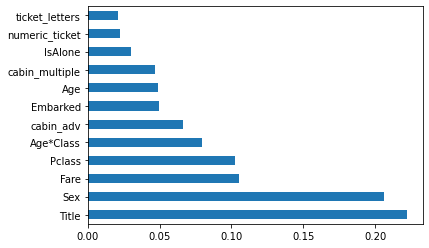

In [71]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,Y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [72]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}


clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train,Y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 2144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4732 tasks      | elapsed:  3.3min


XGB
Best Score: 0.8282907538760906
Best Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 50, 'min_child_weight': 0.01, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.01, 'colsample_bytree': 1}


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  3.5min finished


In [73]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,Y_train)
clf_performance(best_clf_xgb,'XGB')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  3.0min finished


XGB
Best Score: 0.8305567760969179
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.65}


In [74]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test).astype(int)
xgb_submission = {'PassengerId': teste_dados.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)

In [75]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,Y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,Y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,Y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,Y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,Y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,Y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,Y_train,cv=5).mean())

voting_clf_hard : [0.82122905 0.79775281 0.8258427  0.82022472 0.87640449]
voting_clf_hard mean : 0.8282907538760906
voting_clf_soft : [0.81005587 0.80337079 0.80898876 0.79213483 0.87640449]
voting_clf_soft mean : 0.8181909484652564
voting_clf_all : [0.79888268 0.80898876 0.8258427  0.80898876 0.86516854]
voting_clf_all mean : 0.8215742891218378
voting_clf_xgb : [0.79888268 0.80337079 0.83707865 0.80898876 0.87078652]
voting_clf_xgb mean : 0.823821480133074


In [76]:
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train,Y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   17.8s finished


VC Weights
Best Score: 0.828278199736363
Best Parameters: {'weights': [1, 2, 2]}


In [77]:
voting_clf_hard.fit(X_train, Y_train)
voting_clf_soft.fit(X_train, Y_train)
voting_clf_all.fit(X_train, Y_train)
voting_clf_xgb.fit(X_train, Y_train)

best_rf.fit(X_train, Y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test).astype(int)
y_hat_rf = best_rf.predict(X_test).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test).astype(int)

In [78]:
final_data = {'PassengerId': teste_dados.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': teste_dados.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': teste_dados.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': teste_dados.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': teste_dados.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': teste_dados.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [79]:
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [80]:
comparison.difference_hard_all.value_counts()

0    402
1     16
Name: difference_hard_all, dtype: int64

# Salvando os melhores resultados para submissão

In [81]:
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb2.csv', index=False)